In [3]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Check how to create masks for cropped candy images

In [35]:
# image = cv2.imread('*PROJECT_ROOT_FOLDER*/candies_images/cropped_candies/0_0.png')
image = cv2.imread('*PROJECT_ROOT_FOLDER*/candies_example.png')

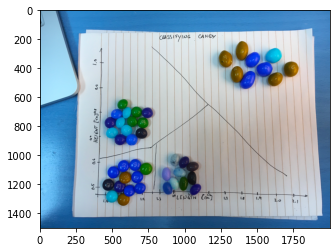

In [36]:
plt.imshow(image)

In [33]:
image_eg = cv2.imread('*PROJECT_ROOT_FOLDER*/candies_images/cropped_candies/0_0.png')

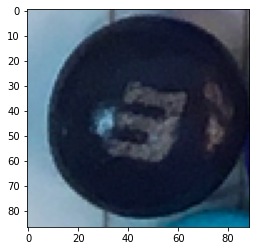

In [29]:
plt.imshow(image_eg)

In [30]:
image_mask_b = np.logical_or((image_eg[:,:,0] > 0), (image_eg[:,:,1] > 0), (image_eg[:,:,2] > 0))
image_mask = image_mask_b.astype(np.uint8)

In [31]:
image_mask_b

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

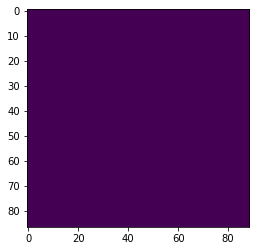

In [32]:
plt.imshow(image_mask)

### Crop candies and their "masks" based on yolo labels

In [37]:
# Take yolo annotations for candies and extract images of candies as separate images
import re
labels_path='*PROJECT_ROOT_FOLDER*/candies_example.txt'
myfile=open(labels_path,'r')
lines=myfile.readlines()

cropped_images_dir = '*PROJECT_ROOT_FOLDER*/candies_images/cropped_candies/' # dir to save candies
cropped_masks_dir = '*PROJECT_ROOT_FOLDER*/candies_images/cropped_masks/' # dir to save candie masks

dh, dw, _ = image.shape
for index, line in enumerate(lines):
    line_elements = line.split(' ')
    object_class, x_center, y_center, width, height = (line_elements[0], float(line_elements[1]),
                                                       float(line_elements[2]), float(line_elements[3]), 
                                                       float(line_elements[4][:-1]))  # Strap values from yolo annotations
    x_center = round(x_center * dw)
    y_center = round(y_center * dh)
    w = round(width * dw)
    h = round(height * dh)
    x = round(x_center - w / 2)
    y = round(y_center - h / 2)
    
    crop_img = image[y:y+h, x:x+w, :]
    candy_name = str(object_class) + '_' + str(index+1) + '.png' #  index+1 because of yolo labeling requirement
    cv2.imwrite(os.path.join(cropped_images_dir, candy_name), crop_img)
    
    crop_img_mask_b = np.logical_or((crop_img[:,:,0] > 0), (crop_img[:,:,1] > 0), (crop_img[:,:,2] > 0))
    crop_img_mask = crop_img_mask_b.astype(np.uint8)
    cv2.imwrite(os.path.join(cropped_masks_dir, candy_name), crop_img_mask)